In [1]:
from keras.datasets import mnist
import numpy as np
 
(x_train, _), (x_test, _) = mnist.load_data()
 
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
 
x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
 
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
 
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
 
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
 
autoencoder = Model(input_img, decoded)
#TODO configure model to use a binary crossentropy loss, and the Adam optimizer:
 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
 
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
 
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.2369 - val_loss: 0.1454
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1354 - val_loss: 0.1270
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1237 - val_loss: 0.1192
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1174 - val_loss: 0.1139
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1134 - val_loss: 0.1107
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1106 - val_loss: 0.1084
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1084 - val_loss: 0.1063
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1068 - val_loss: 0.1049
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1056 - val_loss: 0.1037
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1046 - val_loss: 0.1032
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


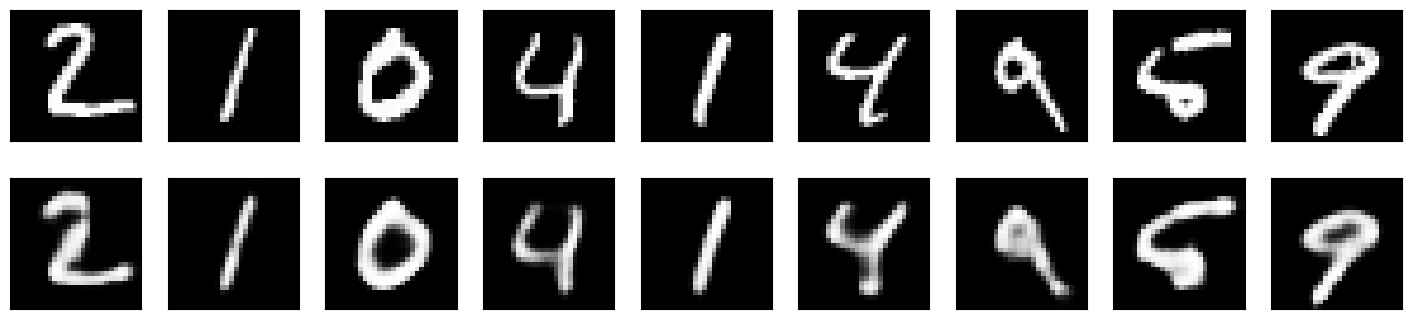

In [3]:
import matplotlib.pyplot as plt
 
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()